# Assessment 4.1 - Logistic Regression
**Submitted by: Rocelle Nathalie Ong**

1. Craft a Logistic Regression problem statement based on a dataset
2. Create a Logistic Regression model based on the problem statement;
3. Interpret the model;
4. Predict the value of an outcome using the model; and 
5. Evaluate the performance of the model.

**Logistic Regression Problem:**
> This study aims to create a logistic regression model that will predict the question,"With the given vital records of the patients, predict whether the patient has diabetes or none".

**Logistic Regression model**

In [1]:
#Import the file

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualization

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data = pd.read_csv('../input/diabetes/diabetes.csv')

/kaggle/input/diabetes/diabetes.csv


In [2]:
data.describe

<bound method NDFrame.describe of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      138             62             35        0  33.6   
1               0       84             82             31      125  38.2   
2               0      145              0              0        0  44.2   
3               0      135             68             42      250  42.3   
4               1      139             62             41      480  40.7   
...           ...      ...            ...            ...      ...   ...   
1995            2       75             64             24       55  29.7   
1996            8      179             72             42      130  32.7   
1997            6       85             78              0        0  31.2   
1998            0      129            110             46      130  67.1   
1999            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                 

In [3]:
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
5,0,173,78,32,265,46.5,1.159,58,0
6,4,99,72,17,0,25.6,0.294,28,0
7,8,194,80,0,0,26.1,0.551,67,0
8,2,83,65,28,66,36.8,0.629,24,0
9,2,89,90,30,0,33.5,0.292,42,0


**Data Preprocessing**

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Replace all zero values as mean (in reality there is no zero values for these features: Glocuse, Blood Pressure, Skin Thickness, Insulin, BMI)
columns_nozero_values = ['Glucose','BloodPressure', 'SkinThickness','Insulin','BMI']

for n in columns_nozero_values:
    data[n] = data[n].replace(0,np.NaN)
    mean = int(data[n].mean())
    data[n] = data[n].replace(np.NaN,mean)

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0,35.0,153.0,33.6,0.127,47,1
1,0,84.0,82.0,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.0,29.0,153.0,44.2,0.630,31,1
3,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0,41.0,480.0,40.7,0.536,21,0


In [7]:
# Visualizing the data
import seaborn as sns
import matplotlib.pyplot as plt

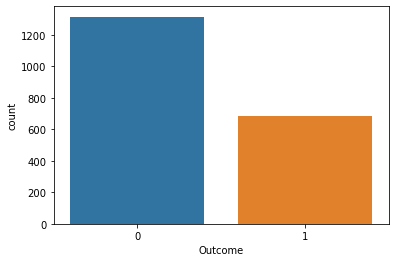

In [8]:
sns.countplot(x='Outcome',data=data)

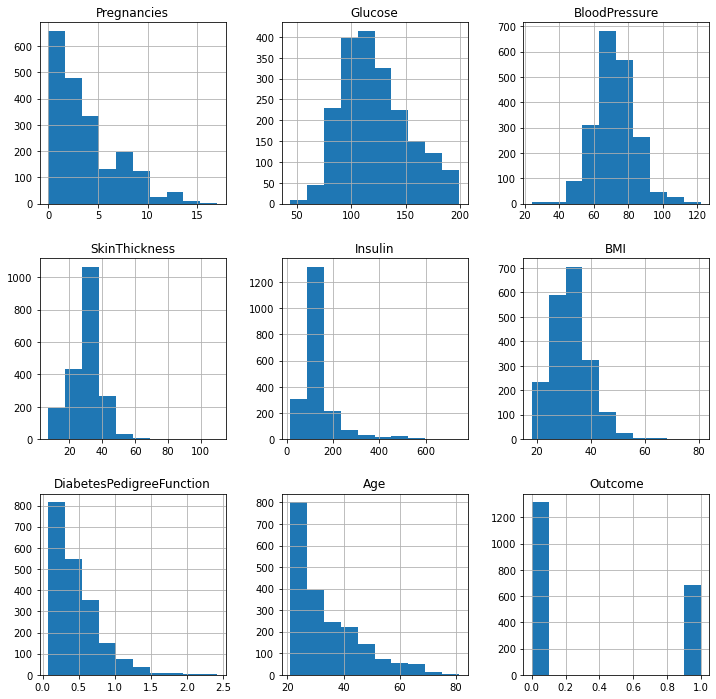

In [9]:
data.hist(figsize=(12,12))
plt.show()

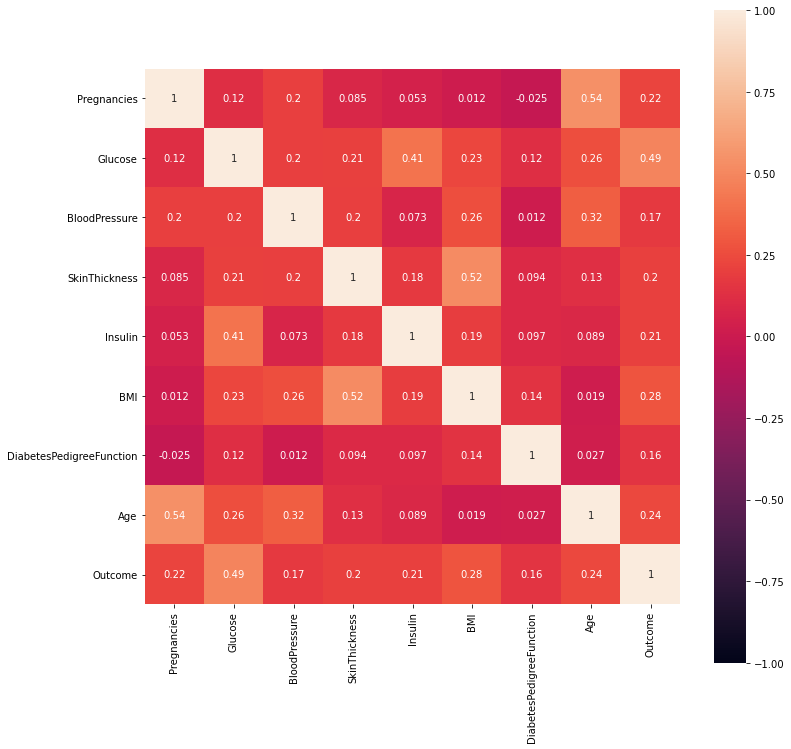

In [10]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 12))

sns.heatmap(corrmat, vmax = 1, square = True,annot=True,vmin=-1)
plt.show()

> With the correlation matrix, we could see that Glucose, BMI and Age are the three features with high correlation with diabetes. In reality these are the main vitals in checking if the person has diabetes

In [11]:
# Assign the independent and dependent variables
X=data.iloc[:,0:8]
Y=data.iloc[:,8]

In [12]:
# Split the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=0)

In [13]:
# Apply feature scaling in the dataset
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train_standard = X_train.copy()
X_test_standard = X_test.copy()
X_train_standard = standard_scaler.fit_transform(X_train_standard)
X_test_standard = standard_scaler.fit_transform(X_test_standard)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))
print('X_train size: {}, X_test size: {}'.format(Y_train.shape, Y_test.shape))
print('X_train_standard size: {}, X_test_standard size: {}'.format(X_train_standard.shape, X_test_standard.shape))

X_train size: (1400, 8), X_test size: (600, 8)
X_train size: (1400,), X_test size: (600,)
X_train_standard size: (1400, 8), X_test_standard size: (600, 8)


**Creating the Logistic Regression model**

In [14]:
# Fit the data in the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100,random_state=0, solver='lbfgs')
lr.fit(X_train_standard, Y_train)

LogisticRegression(C=100, random_state=0)

In [15]:
Y_predict = lr.predict(X_test_standard)

**Interpret the model**

[[356  41]
 [ 91 112]]


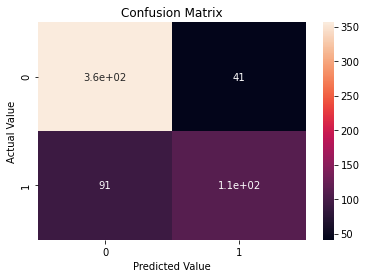

In [16]:
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)

# To show the confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test,Y_predict)

import seaborn as sns
sns.heatmap(confusion, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
print(confusion)

tp = confusion[1, 1]
tn = confusion[0, 0]
fp = confusion[0, 1]
fn = confusion[1, 0]

> With the confusion matrix, we could see that the model can able to predict 112 records with diabetes and 356 records without diabetes.

In [21]:
models = []
models.append(("Logistic Regression", lr))
classification_reports = []

for name, model in models:

    # Classification Accuracy
    classification_accuracy = accuracy_score(Y_test, Y_predict)
    print("{} Classification Accuracy: {:.4f}".format(
        name, classification_accuracy))
    # Classification Error
    classificaton_error = 1 - classification_accuracy
    print("{} Classification Error: {:.4f}".format(name, classificaton_error))
    # Sensitivity or Recall Score or True Positive Rate
    sensitivity = recall_score(Y_test, Y_predict)
    print("{} Sensitivity: {:.4f}".format(name, sensitivity))
    # Specificity or True Negative Rate
    specificity = tn / (tn + fp)
    print("{} Specificity: {:.4f}".format(name, specificity))
    # False Positive Rate
    fpr = 1 - specificity
    print("{} False Positive Rate: {:.4f}".format(name, fpr))
    # Precision or False Negative Rate
    precision = precision_score(Y_test, Y_predict)
    print("{} Precision: {:.4f}".format(name, precision))
    # F1 Score
    classification_f1 = f1_score(Y_test, Y_predict)
    print("{} Classification F1: {:.4f}".format(name, classification_f1))
    # Classification Report
    classificationReport = classification_report(Y_test, Y_predict)
    classification_reports.append(classificationReport)
    print("\n")
    print("{} Classification Report: \n{}".format(name, classificationReport))
    print("\n\n")


Logistic Regression Classification Accuracy: 0.7800
Logistic Regression Classification Error: 0.2200
Logistic Regression Sensitivity: 0.5517
Logistic Regression Specificity: 0.8967
Logistic Regression False Positive Rate: 0.1033
Logistic Regression Precision: 0.7320
Logistic Regression Classification F1: 0.6292


Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       397
           1       0.73      0.55      0.63       203

    accuracy                           0.78       600
   macro avg       0.76      0.72      0.74       600
weighted avg       0.77      0.78      0.77       600






> With the classification report, we could see that the classification accuracy of the model is 0.78. This means that there is 78% in which the model can predict the correct outcome.

**Predict the value of an outcome**
> Input Order: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction,Age**

In [18]:
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DiabetesPedigreeFunction)
    age = int(Age)

    inputs = [[preg, glucose, bp, st, insulin, bmi, dpf, age]]
    inputs = standard_scaler.transform(inputs)

    return lr.predict(inputs)    

Use the values that are present in the dataset
* > Input: 7,195,70,33,145,25.1,0.163,55
* > Expected Output: 1 (with diabetes)

Use the values that are not present in the dataset
* > Input: 0,120.0,98.0,55.0,170.0,31.6,0.127,22


In [19]:
prediction = predict_diabetes(7,195,70,33,145,25.1,0.163,55)[0]
if prediction:
  print('Diabetes Test Result: Positive')
else:
  print('Diabetes Test Result: Negative')

Diabetes Test Result: Positive


In [20]:
prediction = predict_diabetes(0,120.0,98.0,55.0,170.0,31.6,0.127,22)[0]
if prediction:
  print('Diabetes Test Result: Positive')
else:
  print('Diabetes Test Result: Negative')

Diabetes Test Result: Negative


In [23]:
lr.predict(X_test_standard[:10])

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [24]:
Y_test[:10]

405     0
1190    0
1132    1
731     1
1754    1
1178    0
1533    0
1303    0
1857    0
18      0
Name: Outcome, dtype: int64

In [25]:
lr.predict_proba(X_test_standard[:10])

array([[0.57633219, 0.42366781],
       [0.8874413 , 0.1125587 ],
       [0.14505711, 0.85494289],
       [0.75783427, 0.24216573],
       [0.41283579, 0.58716421],
       [0.80453164, 0.19546836],
       [0.85566308, 0.14433692],
       [0.89964565, 0.10035435],
       [0.35426012, 0.64573988],
       [0.89407816, 0.10592184]])

> With the result above, we could see the prediction probability of the model using the first 10 inputs from X_test_standard data. The columns represent the probability for zero and one respectively. Probability with less than 0.5 value indicates that the event is less likely to happen while probability with greater that 0.5 indicates that the event is more likely to happen.

> For example the first row, we have 0.57633219 and 0.42366781 probabilities for 0 and 1. This means that with the given medical records, the person does not have diabetes (Outcome =0)